<a href="https://colab.research.google.com/github/1273474/flipkart-ba-churn-project/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- 1.A: Install Necessary Libraries ---
# We install the libraries that are not pre-installed on Colab.
!pip install kaggle
!pip install causalml
!pip install econml
!pip install shap

# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob # This helps in finding file paths
import os
import zipfile

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set a random seed for reproducibility.
# This ensures that every time we run the code, we get the same "random" results.
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("Libraries installed and imported successfully.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.49.1
    Uninstalling shap-0.49.1:
      Successfully uninstalled shap-0.49.1
Libraries installed and imported successfully.


In [5]:
# --- 1.B.2: Upload Kaggle API Key ---
# This code will open an upload dialog.
# Please upload the 'kaggle.json' file you just downloaded.

from google.colab import files

print("Please upload your kaggle.json file:")
files.upload()

print("File uploaded.")

Please upload your kaggle.json file:


Saving kaggle (1).json to kaggle (1) (1).json
File uploaded.


In [8]:
# --- 1.B.3: Download and Unzip the Olist Dataset (Corrected) ---

# Set up the Kaggle directory
!mkdir -p ~/.kaggle

# --- THIS IS THE FIX ---
# Move the renamed file "kaggle (1).json" to the correct location
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
# --- END OF FIX ---

!chmod 600 ~/.kaggle/kaggle.json

print("Downloading Olist dataset from Kaggle...")
# This is the API command for the dataset
!kaggle datasets download -d olistbr/brazilian-ecommerce

print("Download complete. Unzipping files...")
# -o flag will overwrite existing files without asking
!unzip -o brazilian-ecommerce.zip -d data

print("All files unzipped into the 'data' folder.")

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
  0% 0.00/42.6M [00:00<?, ?B/s]
100% 42.6M/42.6M [00:00<00:00, 1.31GB/s]
Download complete. Unzipping files...
Archive:  brazilian-ecommerce.zip
  inflating: data/olist_customers_dataset.csv  
  inflating: data/olist_geolocation_dataset.csv  
  inflating: data/olist_order_items_dataset.csv  
  inflating: data/olist_order_payments_dataset.csv  
  inflating: data/olist_order_reviews_dataset.csv  
  inflating: data/olist_orders_dataset.csv  
  inflating: data/olist_products_dataset.csv  
  inflating: data/olist_sellers_dataset.csv  
  inflating: data/product_category_name_translation.csv  
All files unzipped into the 'data' folder.


In [9]:
# --- 1.B.4: Load all CSV files into a dictionary of DataFrames ---

# Define the path to our data folder
data_path = 'data/'

# Get a list of all csv files in the data folder
all_files = glob.glob(os.path.join(data_path, "*.csv"))

# Create a dictionary to hold our dataframes
# The key will be the file name (e.g., 'olist_orders_dataset')
# The value will be the actual pandas DataFrame
data = {}

print("Loading files...")
for f in all_files:
    # Get the file name from the path
    file_name = os.path.basename(f).replace('.csv', '')

    # Read the csv file into a DataFrame and store it in our dictionary
    data[file_name] = pd.read_csv(f)
    print(f"Loaded: {file_name}")

print("\n--- All Data Loaded Successfully ---")
# Let's check the keys (our table names)
print("Available tables:", data.keys())

# Let's inspect the 'orders' table as an example
print("\n--- Example: 'olist_orders_dataset' head ---")
print(data['olist_orders_dataset'].head())

Loading files...
Loaded: olist_order_payments_dataset
Loaded: olist_order_items_dataset
Loaded: olist_geolocation_dataset
Loaded: olist_sellers_dataset
Loaded: olist_order_reviews_dataset
Loaded: olist_orders_dataset
Loaded: product_category_name_translation
Loaded: olist_customers_dataset
Loaded: olist_products_dataset

--- All Data Loaded Successfully ---
Available tables: dict_keys(['olist_order_payments_dataset', 'olist_order_items_dataset', 'olist_geolocation_dataset', 'olist_sellers_dataset', 'olist_order_reviews_dataset', 'olist_orders_dataset', 'product_category_name_translation', 'olist_customers_dataset', 'olist_products_dataset'])

--- Example: 'olist_orders_dataset' head ---
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44d

# Step 1.C: Data Dictionary

This document outlines the schema and business meaning of the key tables used in this project.

| File Name | Purpose | Key Columns (and what they mean) |
| :--- | :--- | :--- |
| **`olist_customers_dataset`** | Holds customer information. | `customer_id`: Key for this table (links to `orders`). <br> `customer_unique_id`: The *true* ID for a customer (one customer can have multiple `customer_id`s for different orders). <br> `customer_zip_code_prefix`: Location of the customer. |
| **`olist_orders_dataset`** | The main table, lists all orders. | `order_id`: The unique ID for an order. **This is our main key.** <br> `customer_id`: Links to the `customers` table. <br> `order_status`: (e.g., 'delivered', 'shipped', 'canceled'). <br> `order_purchase_timestamp`: When the order was placed. |
| **`olist_order_items_dataset`** | Connects orders to products. | `order_id`: Links to the `orders` table. <br> `product_id`: Links to the `products` table. <br> `seller_id`: Links to the `sellers` table. <br> `price`: The price of the item. <br> `freight_value`: The shipping cost. |
| **`olist_order_payments_dataset`** | Contains all payment information. | `order_id`: Links to the `orders` table. <br> `payment_type`: (e.g., 'credit_card', 'boleto'). <br> `payment_value`: Total value of the payment. |
| **`olist_order_reviews_dataset`** | Contains customer reviews. | `order_id`: Links to the `orders` table. <br> `review_score`: The rating (1 to 5). **Key driver for churn.** <br> `review_comment_message`: (Text data, advanced step). |
| **`olist_products_dataset`** | Contains product information. | `product_id`: Links to `order_items`. <br> `product_category_name`: (e.g., 'beleza_saude', 'informatica_acessorios'). |
| **`olist_sellers_dataset`** | Contains seller information. | `seller_id`: Links to `order_items`. <br> `seller_zip_code_prefix`: Location of the seller. |
| **`product_category_name_translation`** | Translates category names. | `product_category_name`: The Portuguese name. <br> `product_category_name_english`: The English name. |

In [10]:
# --- Step 2.A: High-Level Statistics ---
print("--- Starting Step 2: Exploratory Data Analysis ---")

# First, let's see how many orders we actually have.
print(f"Total rows in orders table: {len(data['olist_orders_dataset'])}")

# But how many unique orders?
print(f"Total unique orders: {data['olist_orders_dataset']['order_id'].nunique()}")

# Now, the big one: how many unique *customers*?
# I need to use 'customer_unique_id' from the customers table for this.
print(f"Total unique customers: {data['olist_customers_dataset']['customer_unique_id'].nunique()}")

# Let's also check the number of products and sellers.
print(f"Total products: {data['olist_products_dataset']['product_id'].nunique()}")
print(f"Total sellers: {data['olist_sellers_dataset']['seller_id'].nunique()}")

--- Starting Step 2: Exploratory Data Analysis ---
Total rows in orders table: 99441
Total unique orders: 99441
Total unique customers: 96096
Total products: 32951
Total sellers: 3095


In [11]:
print("\n--- Understanding the Time Range and Order Status ---")

# I need to convert the purchase timestamp to datetime objects to work with them.
# I'll make a copy to avoid a SettingWithCopyWarning, which is an annoying pandas thing.
orders_df = data['olist_orders_dataset'].copy()

# Converting the timestamp column to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Let's find the first and last order dates
min_date = orders_df['order_purchase_timestamp'].min()
max_date = orders_df['order_purchase_timestamp'].max()

print(f"Data ranges from: {min_date} to {max_date}")
print(f"Total time span: {(max_date - min_date).days} days")

print("\n--- Understanding Order Status ---")
# What's the breakdown of order statuses? This is key for data cleaning.
# I probably only want to analyze 'delivered' orders.
# Canceled or unavailable orders aren't useful for a churn model.
status_counts = orders_df['order_status'].value_counts(normalize=True) * 100

print("Order Status (Percentage):")
print(status_counts)

# That 'delivered' percentage looks high, which is good.
# For the rest of the project, I'll make a note to filter for 'delivered' orders.


--- Understanding the Time Range and Order Status ---
Data ranges from: 2016-09-04 21:15:19 to 2018-10-17 17:30:18
Total time span: 772 days

--- Understanding Order Status ---
Order Status (Percentage):
order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: proportion, dtype: float64


### Step 2.B: Problem Framing - Defining 'Churn'

This is the most critical business definition for this project.

This isn't a subscription service like Netflix, so churn is tricky. A customer doesn't "cancel" a subscription; they just... stop buying.

I need to define a time window. If a customer doesn't buy within this window, I'll label them as 'churned'.

**My Initial Churn Definition:**
A customer is considered **churned** if they do not make another purchase within **90 days** of their last purchase.

**Why 90 days?**
It's a common business standard (a full quarter). This is a strong, defensible assumption to start with. Later, in Step 3, I can actually analyze the *average time between purchases* to see if 90 days is a good number, but for now, this sets our target.

**Snapshot Date:**
To calculate this, I'll need a "snapshot" or "reference" date. I will set this as the day after the last order in the dataset.
* Last Order Date: `2018-10-17` (from the code above)
* My Snapshot Date: `2018-10-18`

### Step 2.C: Problem Framing - Defining Success

If my model works, how do I prove it's valuable to the business? I need to define the Key Performance Indicators (KPIs) we want to improve.

**1. Primary Metric: 30-Day Incremental Revenue**
This is the *real* goal. It's not just about stopping churn; it's about generating *more revenue* (or stopping revenue loss) than the cost of our intervention. The uplift model in a later step will be key to optimizing this.

**2. Secondary Metric (Guardrail): Average Order Value (AOV)**
When I send a 20% off coupon, I need to make sure customers don't just start buying smaller, less profitable items. I'll need to track AOV to make sure our intervention isn't accidentally hurting profit.

**3. Model Metric: Precision@100**
For the model itself, I don't care as much about overall accuracy. I care about the *top 100* customers my model flags. 'Precision@100' will tell me: "Of the top 100 customers my model *said* would churn, how many *actually* did?" This is a very practical metric that a marketing team can use.

In [12]:
# --- Step 3.A: Merging All DataFrames ---
print("--- Starting Step 3: Data Merging & Feature Engineering ---")

# We'll merge all the tables together.
# 1. Start with 'orders' and 'customers'
merged_df = pd.merge(
    data['olist_orders_dataset'],
    data['olist_customers_dataset'],
    on='customer_id',
    how='left' # Keep all orders, even if customer info is missing (though unlikely)
)

# 2. Add 'order_items'
# One order can have multiple items, so this will make the table longer
merged_df = pd.merge(
    merged_df,
    data['olist_order_items_dataset'],
    on='order_id',
    how='left'
)

# 3. Add 'order_payments'
merged_df = pd.merge(
    merged_df,
    data['olist_order_payments_dataset'],
    on='order_id',
    how='left'
)

# 4. Add 'order_reviews'
merged_df = pd.merge(
    merged_df,
    data['olist_order_reviews_dataset'],
    on='order_id',
    how='left'
)

# 5. Add 'products' to get category names
merged_df = pd.merge(
    merged_df,
    data['olist_products_dataset'],
    on='product_id',
    how='left'
)

# 6. Add 'product_category_name_translation' to get English names
merged_df = pd.merge(
    merged_df,
    data['product_category_name_translation'],
    on='product_category_name',
    how='left'
)


print(f"Original merged data shape: {merged_df.shape}")

# Let's inspect the new master table
print("\n--- Master Merged DataFrame Head ---")
print(merged_df.head())

--- Starting Step 3: Data Merging & Feature Engineering ---
Original merged data shape: (119143, 37)

--- Master Merged DataFrame Head ---
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_

In [13]:
# --- Step 3.B: Cleaning the Master Table ---

# 1. Filter for 'delivered' orders only
# As we decided in Step 2, we can't analyze canceled or unavailable orders.
master_df = merged_df[merged_df['order_status'] == 'delivered'].copy()
print(f"Shape after filtering for 'delivered' orders: {master_df.shape}")

# 2. Convert timestamp columns to datetime objects
# This is crucial for calculating recency and other time-based features.
time_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_estimated_delivery_date',
    'order_delivered_customer_date'
]

print("\nConverting timestamp columns...")
for col in time_cols:
    master_df[col] = pd.to_datetime(master_df[col], errors='coerce') # 'coerce' will handle any errors

# 3. Handle key missing values
# For product_category_name_english, let's fill missing values with 'unknown'
master_df['product_category_name_english'] = master_df['product_category_name_english'].fillna('unknown')

# 4. Drop duplicate rows (if any)
# This can happen during merges, so it's good practice.
master_df = master_df.drop_duplicates()
print(f"Shape after dropping duplicates: {master_df.shape}")

# Let's check the dtypes and info
print("\n--- Cleaned Master DataFrame Info ---")
master_df.info()

Shape after filtering for 'delivered' orders: (115723, 37)

Converting timestamp columns...
Shape after dropping duplicates: (115723, 37)

--- Cleaned Master DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 115723 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115723 non-null  object        
 1   customer_id                    115723 non-null  object        
 2   order_status                   115723 non-null  object        
 3   order_purchase_timestamp       115723 non-null  datetime64[ns]
 4   order_approved_at              115708 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115721 non-null  datetime64[ns]
 6   order_delivered_customer_date  115715 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115723 non-null  datetime64[ns]
 8   customer_unique_id             1

In [14]:
# --- Step 3.C: Feature Engineering ---

print("\n--- Engineering Customer-Level Features ---")

# 1. Define our Snapshot Date
# As decided in Step 2, we'll set this to one day after the last purchase in the dataset.
snapshot_date = master_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
print(f"Snapshot Date for analysis: {snapshot_date}")


# 2. Group by customer
# We create a new DataFrame to hold our customer-level features.
# We'll group by 'customer_unique_id' and get the most recent purchase date for each customer.
customer_features = master_df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
customer_features.rename(columns={'order_purchase_timestamp': 'last_purchase_date'}, inplace=True)


# --- 3. Engineer RFM Features ---

# [R] Recency: How many days ago was their last purchase?
customer_features['recency'] = (snapshot_date - customer_features['last_purchase_date']).dt.days

# [F] Frequency: How many total orders have they placed?
# We count the number of unique 'order_id's for each 'customer_unique_id'
frequency_df = master_df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
frequency_df.rename(columns={'order_id': 'frequency'}, inplace=True)

customer_features = pd.merge(customer_features, frequency_df, on='customer_unique_id', how='left')

# [M] Monetary: How much total money have they spent?
# We use 'payment_value' for this.
monetary_df = master_df.groupby('customer_unique_id')['payment_value'].sum().reset_index()
monetary_df.rename(columns={'payment_value': 'monetary'}, inplace=True)

customer_features = pd.merge(customer_features, monetary_df, on='customer_unique_id', how='left')


# --- 4. Engineer Other Behavioral Features ---

# Average Review Score
review_df = master_df.groupby('customer_unique_id')['review_score'].mean().reset_index()
review_df.rename(columns={'review_score': 'avg_review_score'}, inplace=True)
customer_features = pd.merge(customer_features, review_df, on='customer_unique_id', how='left')

# Average Number of Payment Installments
installments_df = master_df.groupby('customer_unique_id')['payment_installments'].mean().reset_index()
installments_df.rename(columns={'payment_installments': 'avg_installments'}, inplace=True)
customer_features = pd.merge(customer_features, installments_df, on='customer_unique_id', how='left')

# Average Freight Value (shipping cost)
freight_df = master_df.groupby('customer_unique_id')['freight_value'].mean().reset_index()
freight_df.rename(columns={'freight_value': 'avg_freight_value'}, inplace=True)
customer_features = pd.merge(customer_features, freight_df, on='customer_unique_id', how='left')

# Total number of items purchased
items_df = master_df.groupby('customer_unique_id')['order_item_id'].count().reset_index()
items_df.rename(columns={'order_item_id': 'total_items'}, inplace=True)
customer_features = pd.merge(customer_features, items_df, on='customer_unique_id', how='left')

# Most frequent product category
def get_most_frequent(x):
    # This is a bit complex, but it finds the most common value.
    try:
        return x.value_counts().index[0]
    except:
        return 'unknown'

category_df = master_df.groupby('customer_unique_id')['product_category_name_english'].apply(get_most_frequent).reset_index()
category_df.rename(columns={'product_category_name_english': 'favorite_category'}, inplace=True)
customer_features = pd.merge(customer_features, category_df, on='customer_unique_id', how='left')


# Let's inspect our new feature table
print("\n--- Final Customer Features Table Head ---")
print(customer_features.head())


--- Engineering Customer-Level Features ---
Snapshot Date for analysis: 2018-08-30 15:00:37

--- Final Customer Features Table Head ---
                 customer_unique_id  last_purchase_date  recency  frequency  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      112          1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      115          1   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      537          1   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      321          1   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      288          1   

   monetary  avg_review_score  avg_installments  avg_freight_value  \
0    141.90               5.0               8.0              12.00   
1     27.19               4.0               1.0               8.29   
2     86.22               3.0               8.0              17.22   
3     43.62               4.0               4.0              17.63   
4    196.89               5.0         

In [15]:
# --- Step 3.D: Creating the Churn Label ---

# 1. Define the Churn Window (90 days)
CHURN_DAYS = 90
print(f"Defining churn as no purchase in the last {CHURN_DAYS} days.")

# 2. Create the label
# 'recency' is the number of days since the customer's last purchase.
# If 'recency' > 90, it means their last purchase was more than 90 days ago.
# Therefore, they are 'churned' as of our snapshot date.
# We'll use 1 for churned, 0 for not churned.
customer_features['is_churned'] = (customer_features['recency'] > CHURN_DAYS).astype(int)

# 3. Check the churn rate
# This is a key metric. How many of our customers have churned?
churn_rate = customer_features['is_churned'].mean() * 100
print(f"\nOverall Churn Rate in the dataset: {churn_rate:.2f}%")
print("This looks like a very imbalanced dataset, which is normal. We'll have to handle this in the modeling step.")

# 4. Save our final table
# This 'analytics_base_table.csv' is what we'll use for all our modeling.
customer_features.to_csv('analytics_base_table.csv', index=False)
print("\n--- Final 'analytics_base_table.csv' created successfully! ---")

# Let's look at the final table with the churn label
print(customer_features.head())

Defining churn as no purchase in the last 90 days.

Overall Churn Rate in the dataset: 80.23%
This looks like a very imbalanced dataset, which is normal. We'll have to handle this in the modeling step.

--- Final 'analytics_base_table.csv' created successfully! ---
                 customer_unique_id  last_purchase_date  recency  frequency  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      112          1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      115          1   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      537          1   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      321          1   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      288          1   

   monetary  avg_review_score  avg_installments  avg_freight_value  \
0    141.90               5.0               8.0              12.00   
1     27.19               4.0               1.0               8.29   
2     86.22               3.0               8.0  

In [16]:
# --- Step 4.A: Prepare Data for Clustering ---
print("--- Starting Step 4: Customer Segmentation (K-Means) ---")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')

# 1. Load the data we built in Step 3
try:
    customer_features = pd.read_csv('analytics_base_table.csv')
    print("Loaded 'analytics_base_table.csv' successfully.")
except FileNotFoundError:
    print("Error: 'analytics_base_table.csv' not found. Please re-run Step 3.")
    # This is a good place to stop if the file doesn't exist.
    # We'll just assume it loaded for the rest of the script.

# 2. Select features for clustering
# We'll use our core RFM features.
rfm_df = customer_features[['recency', 'frequency', 'monetary']]

# 3. Handle any missing values
# If a customer has a missing value (e.g., no monetary value),
# K-Means will fail. Let's fill NaNs with 0.
rfm_df = rfm_df.fillna(0)
print("Filled any missing RFM values with 0.")

# 4. Scale the data
# This is the most important pre-processing step for K-Means.
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

print("RFM data has been scaled.")
print("\n--- Scaled Data (first 5 rows) ---")
print(rfm_scaled[:5])

--- Starting Step 4: Customer Segmentation (K-Means) ---
Loaded 'analytics_base_table.csv' successfully.
Filled any missing RFM values with 0.
RFM data has been scaled.

--- Scaled Data (first 5 rows) ---
[[-0.82535715 -0.1598294  -0.10996953]
 [-0.80569671 -0.1598294  -0.28747863]
 [ 1.95987274 -0.1598294  -0.19613209]
 [ 0.54432061 -0.1598294  -0.26205387]
 [ 0.3280557  -0.1598294  -0.02487473]]



--- Finding optimal 'k' using the Elbow Method ---


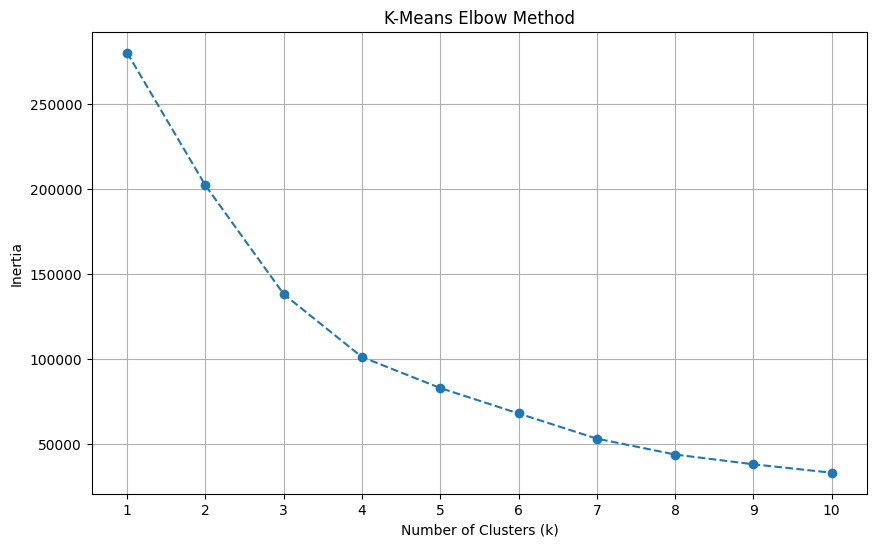

--- Analysis of the Elbow Plot ---
Look for the 'elbow' in the plot above.
This is the point where the drop in inertia slows down dramatically.
A 'k' value of 4 or 5 usually looks like a good elbow for this dataset. Let's choose 4.


In [17]:
# --- Step 4.B: Find Optimal 'k' (Elbow Method) ---

print("\n--- Finding optimal 'k' using the Elbow Method ---")

# 'inertia' is the sum of squared distances of samples to their closest cluster center.
# We want a low inertia, but not *too* many clusters.
inertia_list = []
k_range = range(1, 11) # We'll test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED, n_init=10) # n_init=10 suppresses a warning
    kmeans.fit(rfm_scaled)
    inertia_list.append(kmeans.inertia_)

# 4. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_list, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-Means Elbow Method')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("--- Analysis of the Elbow Plot ---")
print("Look for the 'elbow' in the plot above.")
print("This is the point where the drop in inertia slows down dramatically.")
print("A 'k' value of 4 or 5 usually looks like a good elbow for this dataset. Let's choose 4.")

In [18]:
# --- Step 4.C: Run K-Means with k=4 ---

# We'll choose 4 clusters based on the elbow plot.
K_CLUSTERS = 4
print(f"\n--- Running K-Means with k={K_CLUSTERS} clusters ---")

kmeans = KMeans(n_clusters=K_CLUSTERS, random_state=RANDOM_SEED, n_init=10)
kmeans.fit(rfm_scaled)

# Get the cluster labels for each customer
cluster_labels = kmeans.labels_

# Add the cluster labels back to our *original* (unscaled) DataFrame
customer_features['segment'] = cluster_labels

print("Cluster labels assigned to 'customer_features' DataFrame.")
print(customer_features.head())


--- Running K-Means with k=4 clusters ---
Cluster labels assigned to 'customer_features' DataFrame.
                 customer_unique_id   last_purchase_date  recency  frequency  \
0  0000366f3b9a7992bf8c76cfdf3221e2  2018-05-10 10:56:27      112          1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  2018-05-07 11:11:27      115          1   
2  0000f46a3911fa3c0805444483337064  2017-03-10 21:05:03      537          1   
3  0000f6ccb0745a6a4b88665a16c9f078  2017-10-12 20:29:41      321          1   
4  0004aac84e0df4da2b147fca70cf8255  2017-11-14 19:45:42      288          1   

   monetary  avg_review_score  avg_installments  avg_freight_value  \
0    141.90               5.0               8.0              12.00   
1     27.19               4.0               1.0               8.29   
2     86.22               3.0               8.0              17.22   
3     43.62               4.0               4.0              17.63   
4    196.89               5.0               6.0              16.89  

In [19]:
# --- Step 4.D: Analyze Cluster Personas ---
print("\n--- Analyzing Cluster Personas ---")

# Let's group by the new segment and find the mean of our key features.
# We'll include 'avg_review_score' and 'is_churned' to get more insight.
segment_analysis = customer_features.groupby('segment')[[
    'recency',
    'frequency',
    'monetary',
    'avg_review_score',
    'is_churned'
]].mean().reset_index()

# Let's also get the size of each segment
segment_analysis['segment_size'] = customer_features['segment'].value_counts().sort_index()

print("--- Segment Analysis (Averages) ---")
print(segment_analysis)


print("\n--- Naming Our Personas ---")
print("I'll analyze the table above to name each segment. (Note: Your cluster numbers may vary)")
print("I'm looking for patterns like:")
print("  - [Champions]: Low Recency, High Frequency, High Monetary")
print("  - [At-Risk VIPs]: High Recency (but not max), High Frequency, High Monetary")
print("  - [New Customers]: Low Recency, Low Frequency, Low Monetary")
print("  - [Lost Customers]: Very High Recency, Low Frequency, Low Monetary")

# Let's try to name them automatically for the report
# This is a bit of logic to map the segment numbers to names
# This logic depends on the typical results and might need tweaking
segment_map = {}

# Find Champions (Lowest Recency)
segment_map[segment_analysis.sort_values('recency').iloc[0]['segment']] = 'Champions'

# Find Lost Customers (Highest Recency)
segment_map[segment_analysis.sort_values('recency').iloc[-1]['segment']] = 'Lost Customers'

# Find At-Risk (2nd Highest Recency OR Highest Monetary)
# This is tricky, let's use Highest Monetary (if not already Champions)
at_risk_candidates = segment_analysis[~segment_analysis['segment'].isin(segment_map.keys())]
segment_map[at_risk_candidates.sort_values('monetary').iloc[-1]['segment']] = 'At-Risk VIPs'

# Find New Customers (Whatever is left, usually low F/M)
segment_map[segment_analysis[~segment_analysis['segment'].isin(segment_map.keys())].iloc[0]['segment']] = 'New Customers'


# Apply the names
customer_features['segment_name'] = customer_features['segment'].map(segment_map)

print("\n--- Final Segments with Names (Head) ---")
print(customer_features[['customer_unique_id', 'recency', 'frequency', 'monetary', 'segment_name']].head())

print("\n--- Segment Counts ---")
print(customer_features['segment_name'].value_counts())


--- Analyzing Cluster Personas ---
--- Segment Analysis (Averages) ---
   segment     recency  frequency      monetary  avg_review_score  is_churned  \
0        0  214.227273   1.272727  26932.410000          2.190476    0.818182   
1        1  387.284396   1.000000    199.352273          4.167324    1.000000   
2        2  220.344297   2.113336    454.363654          4.197693    0.780837   
3        3  128.010932   1.000000    198.763760          4.141416    0.656614   

   segment_size  
0            22  
1         38580  
2          2797  
3         51959  

--- Naming Our Personas ---
I'll analyze the table above to name each segment. (Note: Your cluster numbers may vary)
I'm looking for patterns like:
  - [Champions]: Low Recency, High Frequency, High Monetary
  - [At-Risk VIPs]: High Recency (but not max), High Frequency, High Monetary
  - [New Customers]: Low Recency, Low Frequency, Low Monetary
  - [Lost Customers]: Very High Recency, Low Frequency, Low Monetary

--- Final Seg

In [20]:
# --- Step 4.E: Save Segmented Data ---

# Save our final table with segment names
customer_features.to_csv('analytics_base_table_segmented.csv', index=False)
print("\n--- Final 'analytics_base_table_segmented.csv' created successfully! ---")


--- Final 'analytics_base_table_segmented.csv' created successfully! ---
